In [12]:
import networkx as nx 
import numpy as np
from sympy import *
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import numpy.random as rd

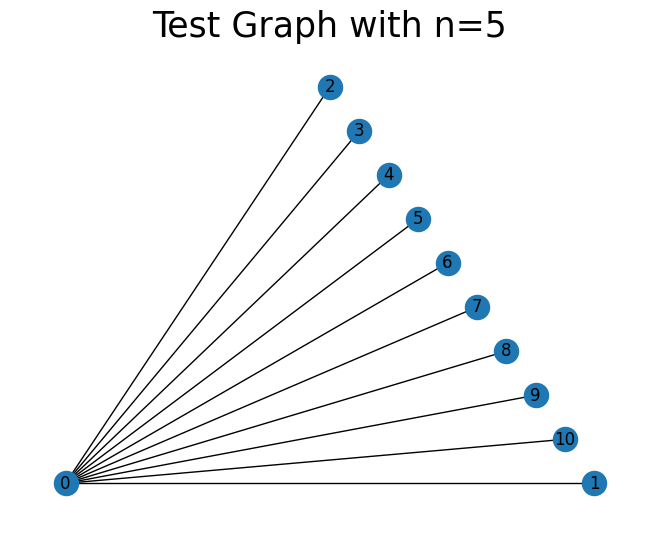

In [11]:
G = nx.star_graph(n=10)
pos = nx.planar_layout(G)
nx.draw(G,pos,arrowstyle="-",with_labels=True)
plt.title(f"Test Graph with n=5", fontsize=25)
plt.show()

[[0. 1. 1. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]]


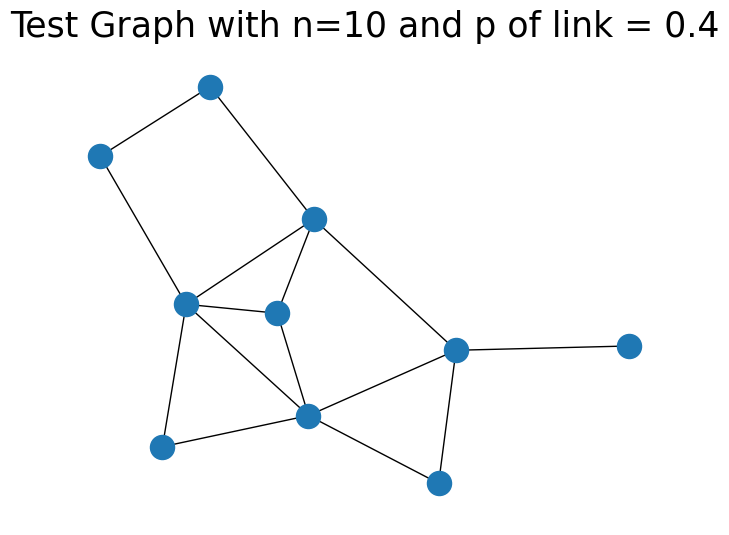

In [109]:
n = 10
p=0.4

adjacency_weights = rd.binomial(1,p,size=(n-1)*n//2)
A = np.zeros((n,n))

start=0
for i in range(n):
    size = n-i-1
    A[i, i+1:] = adjacency_weights[start:start + size]
    start+=size
A+=A.T
print(A)

G = nx.from_numpy_array(A)
pos = nx.spring_layout(G)
#pos = nx.planar_layout(G)
nx.draw(G, pos=pos)
#nx.draw(G,pos,arrowstyle="-")
plt.title(f"Test Graph with n={n} and p of link = {p}", fontsize=25)
plt.show()


## Compute eigenvalues and eigenvectors

In [167]:
D = np.diag(A.sum(axis=1))
L = D - A


eigvals, eigvecs = np.linalg.eig(L) #eigvecs donnés en format colonne!
sorting_order = np.argsort(eigvals)

#on trie par valeur propre décroissante
eigvals = np.array(eigvals)[sorting_order][::-1]
eigvecs = np.array(eigvecs.T)[sorting_order][::-1].T

#check the spectral eigendecomposition
print(L - eigvecs @ np.diag(eigvals) @ eigvecs.T)



[[-4.44089210e-15  8.88178420e-16 -3.33066907e-16 -4.57232085e-15
  -8.88178420e-16 -1.75166047e-15  7.51523233e-15 -1.43247135e-15
   1.55431223e-15 -3.61128404e-15]
 [ 8.88178420e-16 -4.44089210e-16  2.13412011e-15 -2.11226027e-16
  -2.25103815e-16  5.31235620e-16 -7.94093115e-16 -8.21848691e-16
  -1.04389330e-15  4.54907787e-16]
 [-9.99200722e-16  2.12024232e-15  2.22044605e-15  2.22044605e-16
  -4.11803429e-16  3.36664114e-15 -7.10542736e-15 -1.88737914e-15
   1.93809636e-15  3.43516272e-15]
 [-4.57925974e-15 -2.04287134e-16  2.22044605e-16  1.77635684e-15
  -3.10862447e-15  1.35436191e-15  1.33226763e-15  7.18585756e-16
   8.88588656e-16 -5.47762382e-16]
 [-8.88178420e-16 -2.78880243e-16 -2.03853453e-16 -3.10862447e-15
   9.76996262e-15 -4.88498131e-15  1.33226763e-15  1.22339029e-15
  -1.66533454e-15 -9.79708527e-16]
 [-1.69614932e-15  6.14502347e-16  3.25561884e-15  1.35436191e-15
  -4.88498131e-15  3.10862447e-15 -2.55351296e-15 -2.14023853e-15
   1.72472537e-15  6.49196817e-16

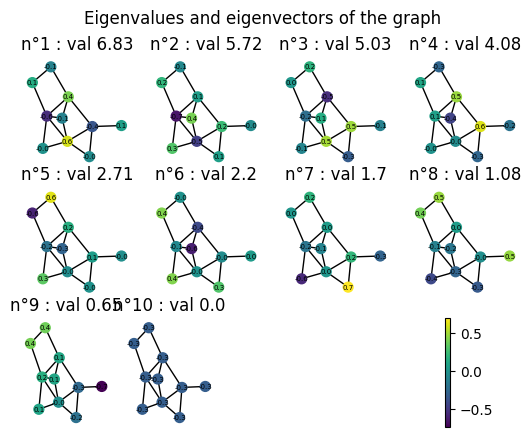

In [199]:
rows = 3
cols = n//rows+1

fig, axs = plt.subplots(rows,cols)
#fig.set_figheight(50)
#fig.set_figwidth(15)
#color grid
norm = mcolors.Normalize(vmin=np.min(eigvecs), vmax=np.max(eigvecs))
scalar_map = plt.cm.ScalarMappable(norm=norm, cmap="viridis")

for i in range(rows):
    for j in range(cols):
        ind = i*cols+j
        if ind < n:
            node_weights = eigvecs[:, ind]
            colors = [scalar_map.to_rgba(value) for value in node_weights]
            nx.draw(G, labels={k:node_weights[k].round(1) for k in range(n)}, node_color=colors, pos=pos, ax=axs[i,j],node_size=50, font_size=5)
            axs[i,j].set_title(f"n°{ind+1} : val {eigvals[ind].round(2)}")
        else:
            axs[i,j].axis('off')
#plt.tight_layout()
fig.colorbar(scalar_map, ax=axs[-1])
fig.suptitle("Eigenvalues and eigenvectors of the graph")
plt.savefig("graph_eigenvectors.png",bbox_inches='tight',dpi=500)
plt.show()

## Convolution of a 1D signal on the graph

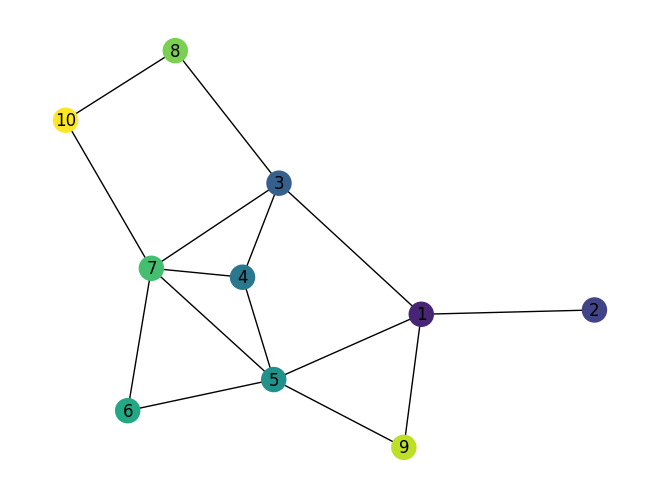

In [145]:
x = [1,2,3,4,5,6,7,8,9,10]
norm_2 = mcolors.Normalize(vmin=0, vmax=np.max(x))
scalar_map_2 = plt.cm.ScalarMappable(norm=norm_2, cmap="viridis")
colors = scalar_map_2.to_rgba(x)
nx.draw(G, labels={k:x[k] for k in range(n)}, node_color=colors, pos=pos)


[ -0.40373342  -1.27076537  -1.80806895  -3.62741126  -1.38976888
   5.029978     2.49678901   0.15458554   5.55021987 -17.39252713]
x_hat :  [ -0.40373342  -1.27076537  -1.80806895  -3.62741126  -1.38976888
   5.029978     2.49678901   0.15458554   5.55021987 -17.39252713]
y_hat : [-0.35708228  0.23414615  0.47867415  0.61379121  0.05320461 -0.04877347
  0.19845326 -0.0353065  -0.25682561 -0.31622777]
convol : [-3.16862528 -0.27224021 -2.3105479  -1.01650966 -1.78085444 -2.28016133
 -1.85904249 -1.76747695 -0.31557734 -2.62149154]


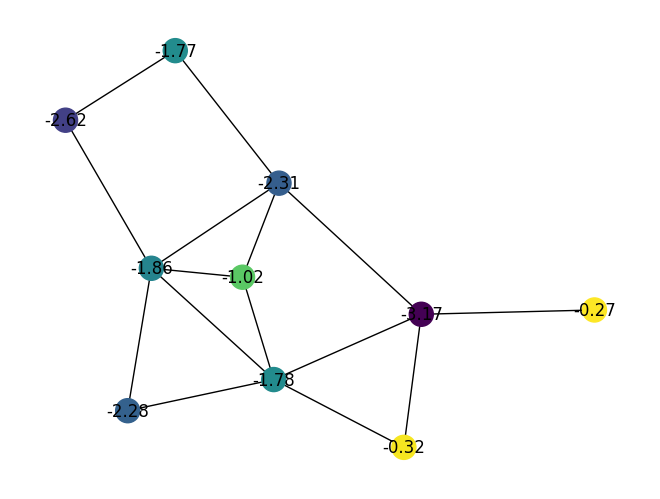

In [200]:
#Graph Fourier transform
x_hat = eigvecs.T @ x
print(x_hat)

#Signal for convolution
y = [1,0,0,0,0,0,0,0,0,0]

def spectral_convolution(x,y, phi, verbose=True):
    x_hat = phi.T @ x
    y_hat = phi.T @ y
    convol = phi @ (x_hat * y_hat)
    if verbose:
        print("x_hat : ", x_hat)
        print("y_hat :", y_hat)
        print("convol :", convol)
    return phi @ (x_hat * y_hat)

def get_color(x: np.array, min: list[str] = ["zero", "array_min"]) -> str:
    if min=="zero":
        norm = mcolors.Normalize(vmin=0, vmax=np.max(x))
    else:
        norm = mcolors.Normalize(vmin=np.min(x), vmax=np.max(x))
    scalar_map = plt.cm.ScalarMappable(norm=norm, cmap="viridis")
    return scalar_map.to_rgba(x)


convol = spectral_convolution(x,y,eigvecs)

colors = scalar_map_2.to_rgba(convol)
nx.draw(G, labels={k:convol[k].round(2) for k in range(n)}, node_color=get_color(convol), pos=pos)


x_hat :  [ -0.40373342  -1.27076537  -1.80806895  -3.62741126  -1.38976888
   5.029978     2.49678901   0.15458554   5.55021987 -17.39252713]
y_hat : [-0.08330132  3.01970569 -0.89161207 -0.08056133  3.30601045  4.19887652
 -5.72037603 -4.22785351  0.95669213 -3.16227766]
convol : [-22.80161328 -16.58954461 -27.89152073 -28.50693008 -14.86617113
  -2.39402711 -12.39901443 -20.95435098 -22.65495931  -4.86713965]


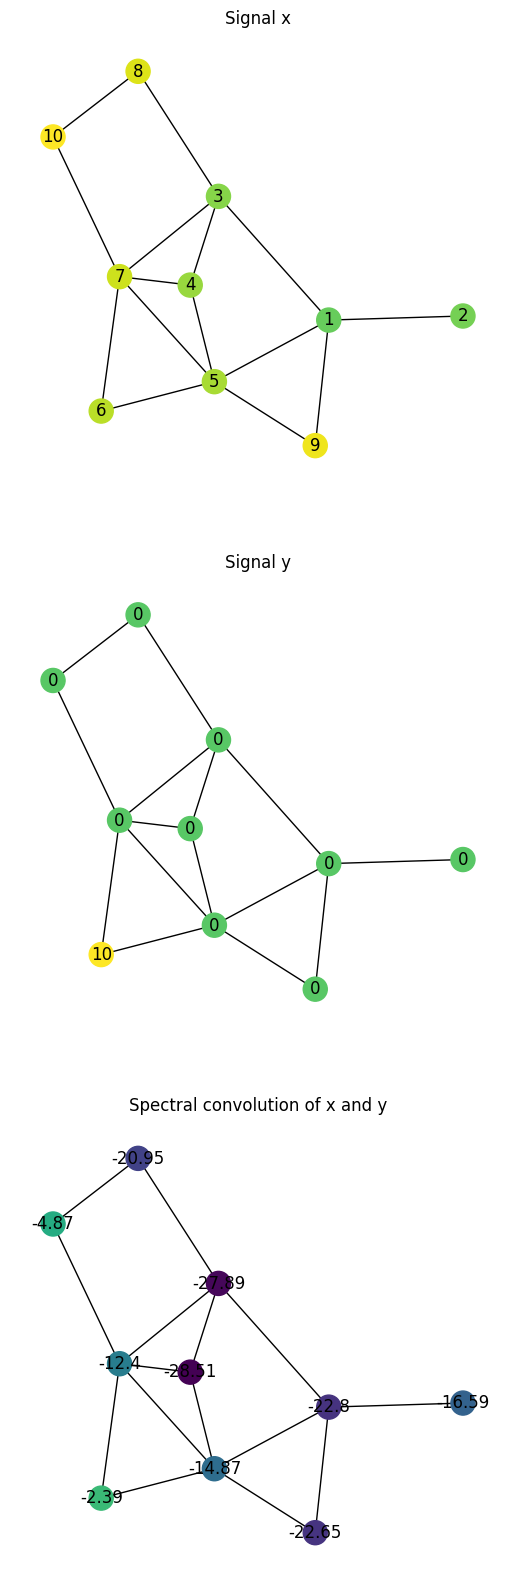

In [206]:
fig, axs = plt.subplots(3,1)
fig.set_figheight(20)


x = [1,2,3,4,5,6,7,8,9,10]
#y = [2,2,2,2,2,2,2,2,2,2]
y=[0,0,0,0,0,10,0,0,0,0]
convol = spectral_convolution(x,y,eigvecs)

norm = mcolors.Normalize(vmin=np.min(np.stack([x,y,convol])), vmax=np.max(np.stack([x,y,convol])))
scalar_map = plt.cm.ScalarMappable(norm=norm, cmap="viridis")
nx.draw(G, labels={k:x[k] for k in range(n)}, node_color=scalar_map.to_rgba(x), pos=pos, ax=axs[0])
nx.draw(G, labels={k:y[k] for k in range(n)}, node_color=scalar_map.to_rgba(y), pos=pos, ax=axs[1])
nx.draw(G, labels={k:convol[k].round(2) for k in range(n)}, node_color=scalar_map.to_rgba(convol), pos=pos, ax = axs[2])
axs[0].set_title("Signal x")
axs[1].set_title("Signal y")
axs[2].set_title("Spectral convolution of x and y")
plt.savefig("graph_convolution.png",bbox_inches='tight',dpi=500)
